In [33]:
  # Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
df = read_csv('/content/Company_Data.csv')


In [34]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [36]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


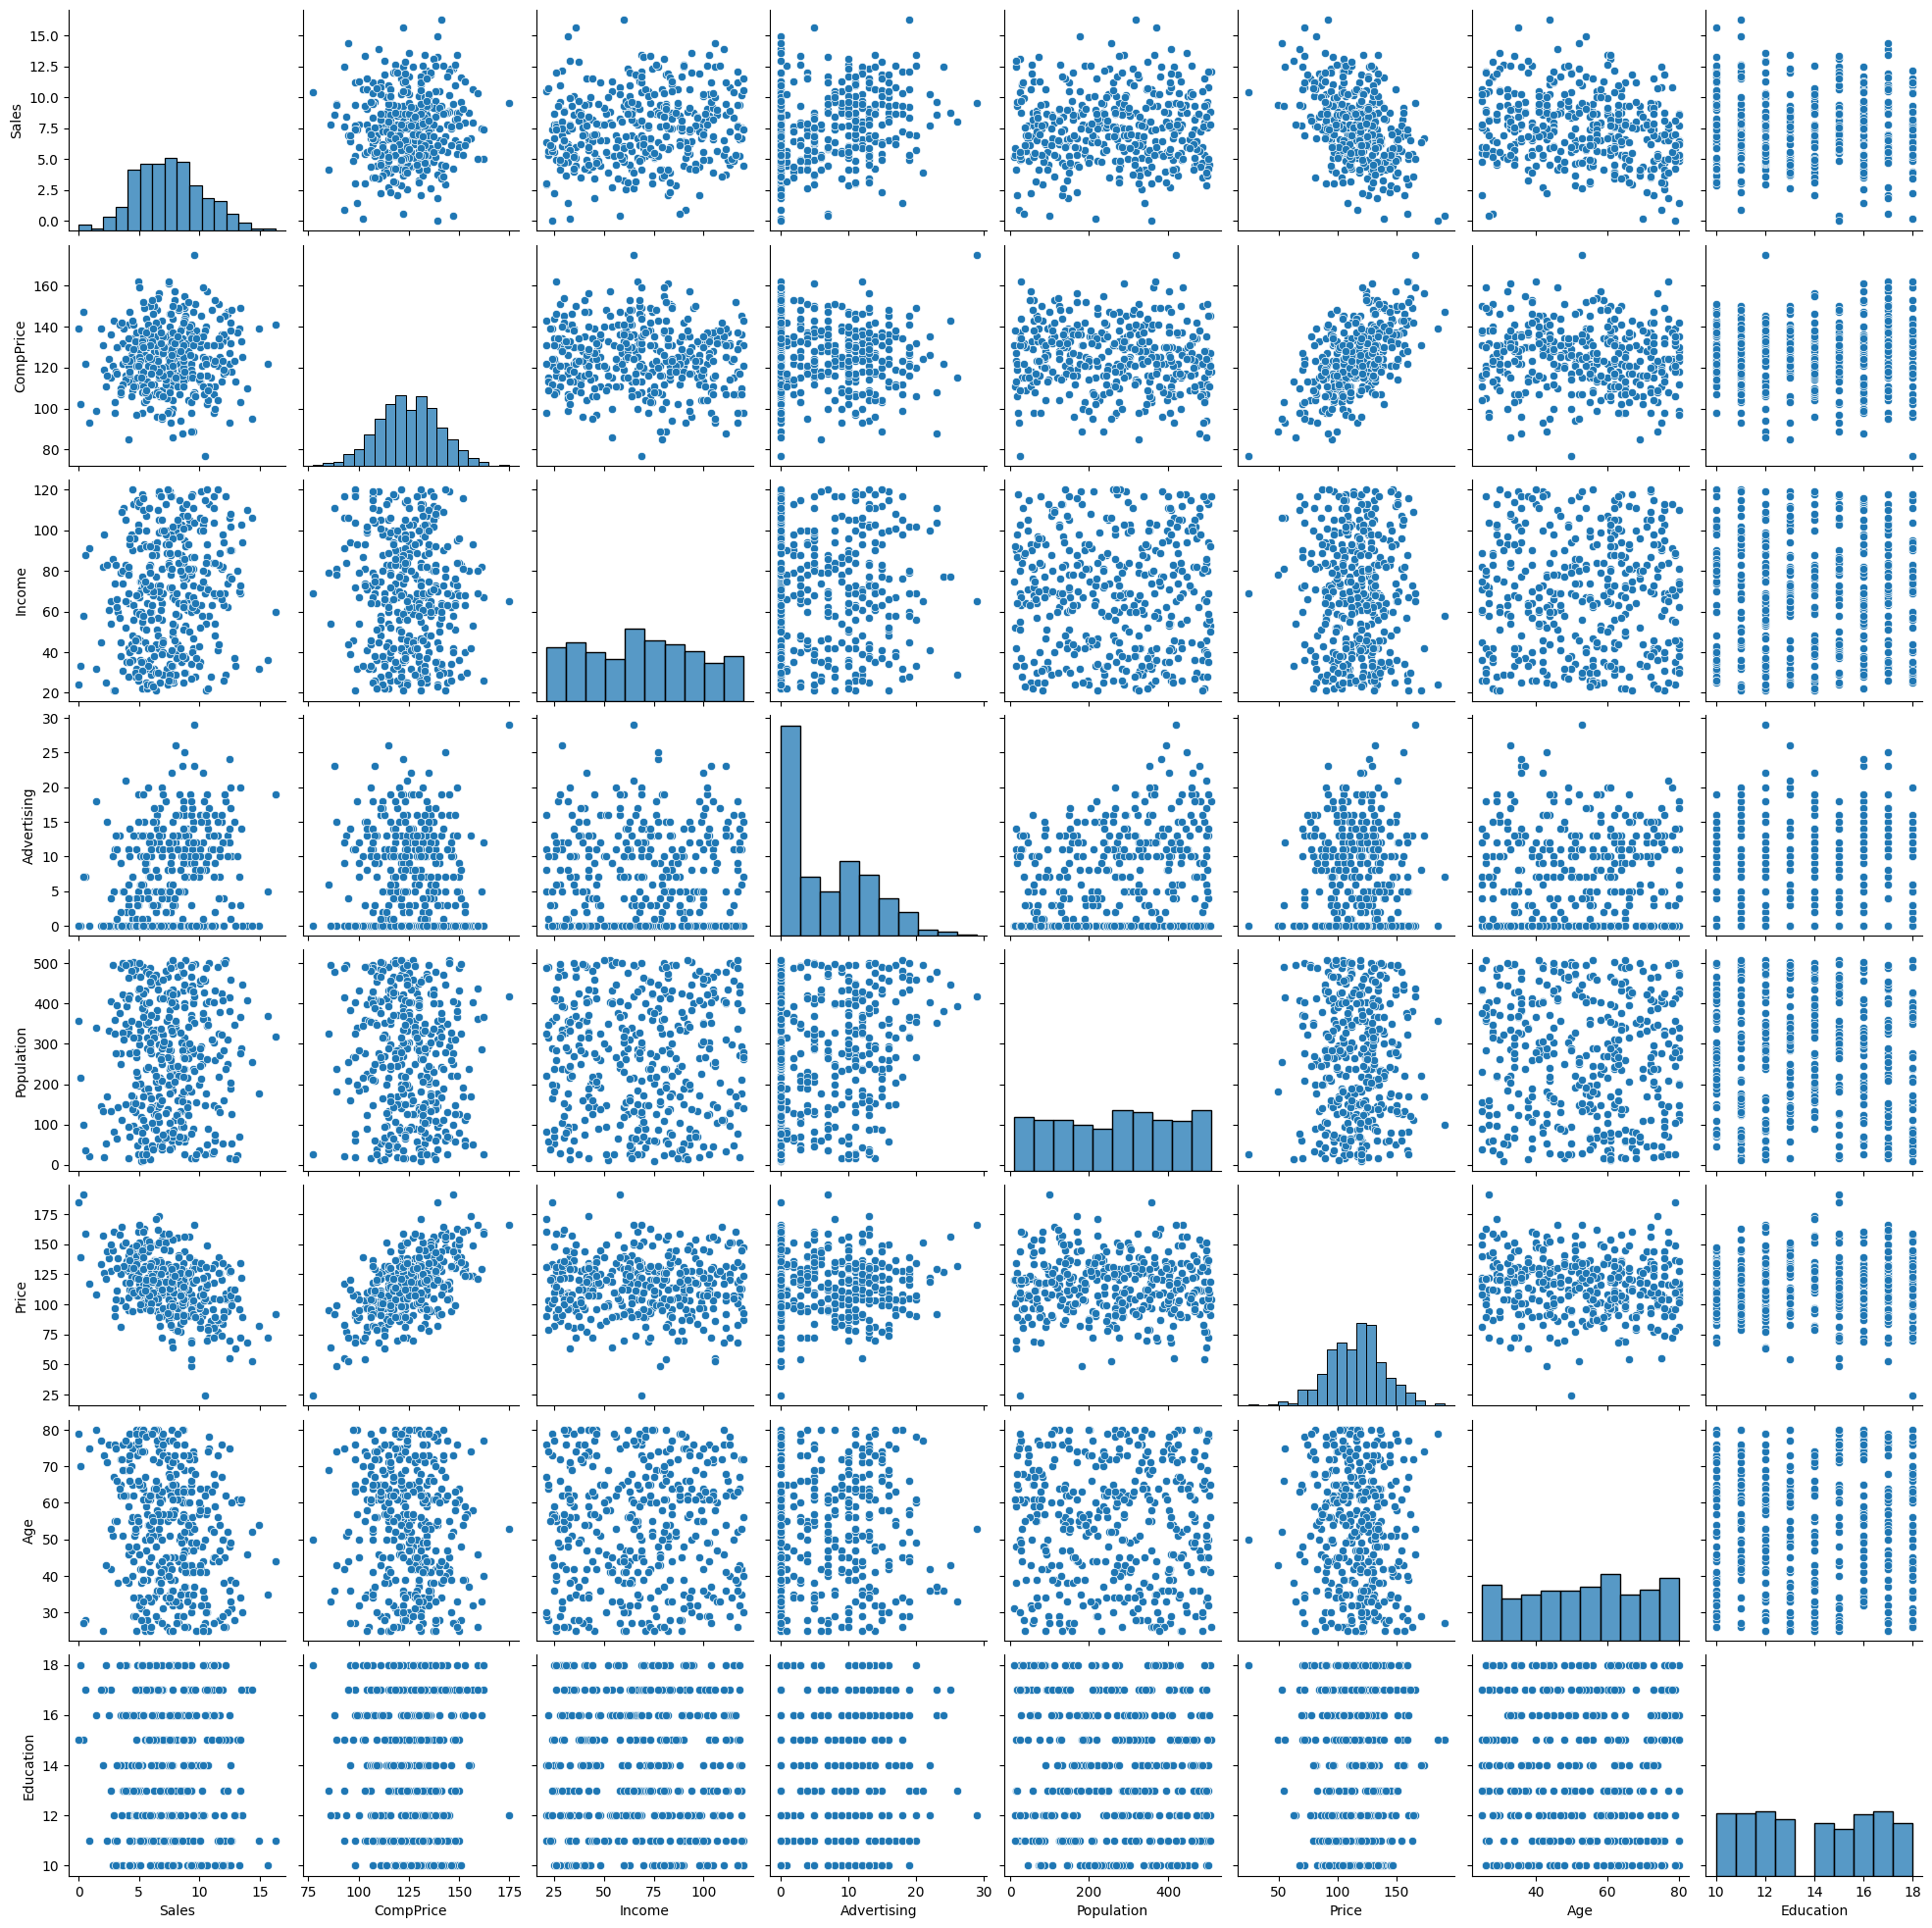

In [5]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
corr = df.corr()
corr

<ipython-input-7-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [37]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)

In [38]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [21]:
df['Sales'].unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [22]:
df['Sales'].max()

16.27

In [23]:
df['Sales'].min()

0.0

In [39]:
import numpy as np
Condition = []
for row in df['Sales']:
    if row > 10 :
        Condition.append('Good')
    else:
        Condition.append('Bad')

In [44]:
df['SALES'] = Condition

In [45]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,SALES
0,9.50,138,73,11,276,120,3,42,17,1,1,Bad
1,11.22,111,48,16,260,83,1,65,10,1,1,Good
2,10.06,113,35,10,269,80,2,59,12,1,1,Good
3,7.40,117,100,4,466,97,2,55,14,1,1,Bad
4,4.15,141,64,3,340,128,3,38,13,1,0,Bad


In [46]:
x=df.drop(['Sales','SALES'],axis = 1)
y=df['SALES']

In [47]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,3,50,12,1,1


In [48]:
y

0       Bad
1      Good
2      Good
3       Bad
4       Bad
       ... 
395    Good
396     Bad
397     Bad
398     Bad
399     Bad
Name: SALES, Length: 400, dtype: object

In [49]:
kfold = KFold(n_splits=10, random_state=None)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=None)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.875


In [50]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


num_trees = 100
max_features = 3
kfold1 = KFold(n_splits=10, random_state=None)
model1 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results1 = cross_val_score(model1, x, y, cv=kfold1)
print(results1.mean())

0.8575000000000002


In [51]:
col = df.columns.tolist()
col

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes',
 'SALES']

In [52]:
import matplotlib.pyplot as plt

In [53]:
model1.fit(x, y)

RandomForestClassifier(max_features=3)

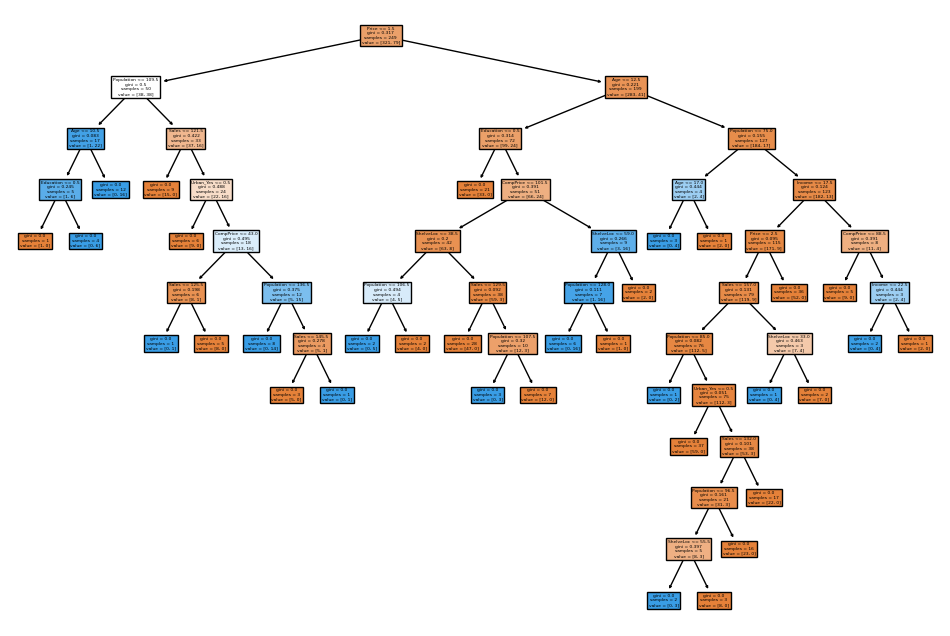

In [54]:
# Choose a tree index to plot (you can choose any tree in the forest)
tree_index = 0
from sklearn.tree import plot_tree
# Plot the selected tree
plt.figure(figsize=(12, 8))
plot_tree(model1.estimators_[tree_index], feature_names=col, filled=True)
plt.show()

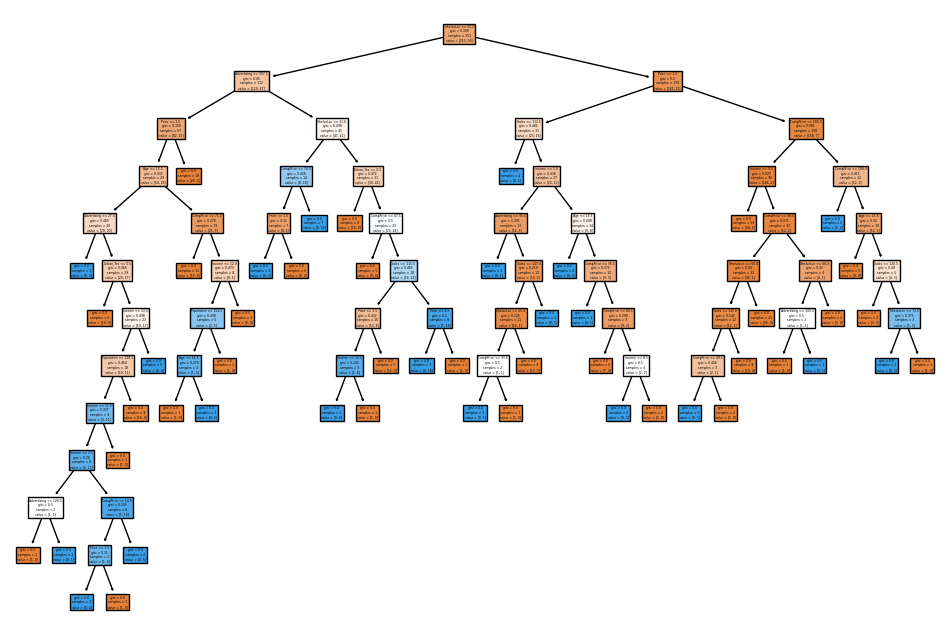

In [55]:
# Choose a tree index to plot (you can choose any tree in the forest)
tree_index1 = 5
from sklearn.tree import plot_tree
# Plot the selected tree
plt.figure(figsize=(12, 8))
plot_tree(model1.estimators_[tree_index1], feature_names=col, filled=True)
plt.show()

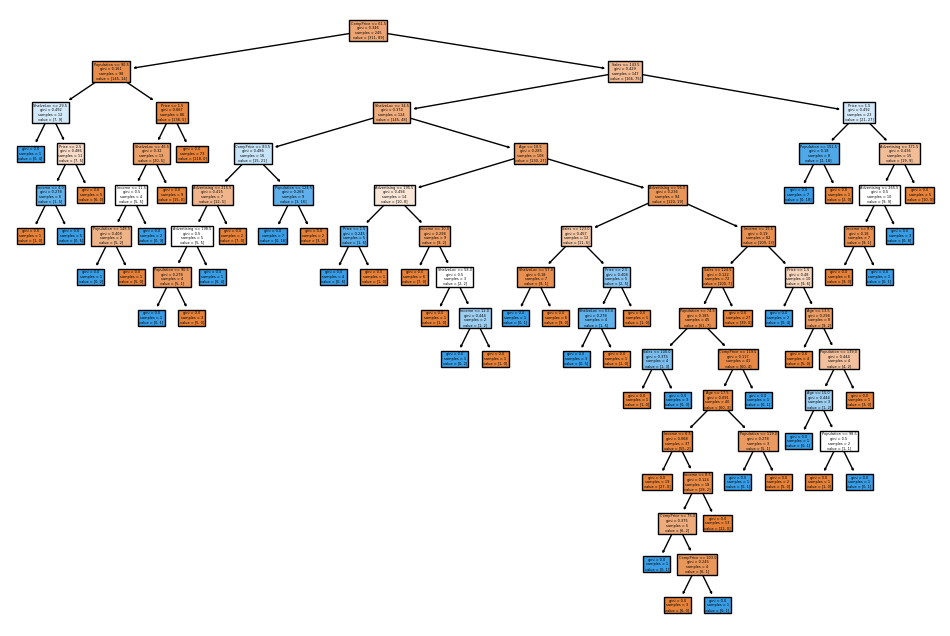

In [56]:
# Choose a tree index to plot (you can choose any tree in the forest)
tree_index2 = 34
from sklearn.tree import plot_tree
# Plot the selected tree
plt.figure(figsize=(12, 8))
plot_tree(model1.estimators_[tree_index2], feature_names=col, filled=True)
plt.show()

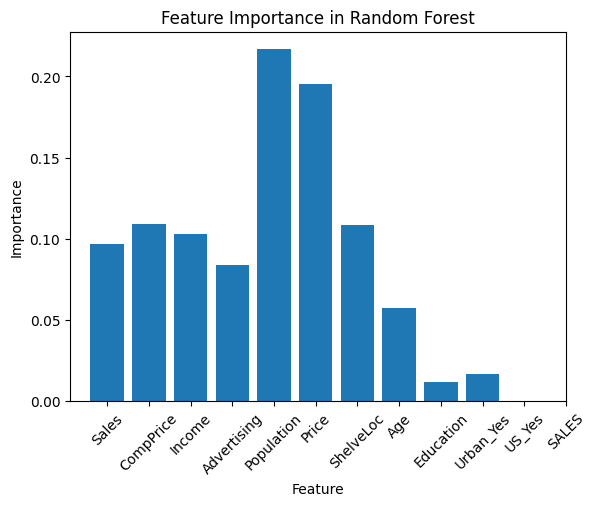

In [57]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


# Get feature importances
feature_importances = model1.feature_importances_

# Plot feature importances
plt.bar(range(x.shape[1]), feature_importances, align="center")
plt.xticks(range(df.shape[1]), col, rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()


In [58]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier


num_trees2 = 10
seed=7
kfold2 = KFold(n_splits=10, random_state=None)
model2 = AdaBoostClassifier(n_estimators=num_trees2, random_state=None)
results2 = cross_val_score(model2, x, y, cv=kfold2)
print(results2.mean())


0.8700000000000001


In [60]:
# Stacking Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold3 = KFold(n_splits=10, random_state=None)

# create the sub models
estimators = []
model = LogisticRegression(max_iter=1000)
estimators.append(('logistic', model))
model1 = DecisionTreeClassifier()
estimators.append(('cart', model1))
model2 = SVC()
estimators.append(('svm', model2))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results3 = cross_val_score(ensemble, x, y, cv=kfold3)
print(results3.mean())

0.885
